In [13]:
#June 6

import ares
import numpy as np
import matplotlib.pyplot as pl
# from ..physics.Constants import 

In [14]:
pop_halo = ares.populations.HaloPopulation()
data = ares.analysis.GalaxyPopulation() #for lit values

Specific Star Formation Rates - dependant on galaxy mass  
Whitaker2014

In [15]:
#[a, b, c] - from Table 1
polyPara = [[-27.4, -26.03, -24.04, -19.99], [5.02, 4.62, 4.17, 3.44], [-0.22, -0.19, -0.16, -0.13]]
#4.1. Polynomial
def polyFit(z, mass):
    if 0.5 <= z < 1.0:
        i = 0
    elif 1.0 <= z < 1.5:
        i = 1
    elif 1.5 <= z < 2.0:
        i = 2
    elif 2.0 <= z < 2.5:
        i = 3
    else:
        print("Out of redshift range")
        return 0        
    
    return polyPara[0][i] + polyPara[1][i]*np.log10(mass) + polyPara[2][i]*(np.log10(mass))**2 #Equ 2

#From Table 3
b = [1.11, 1.31, 1.49, 1.62]
def pl_HL(z, mass):
    if 0.5 <= z < 1.0:
        i = 0
    elif 1.0 <= z < 1.5:
        i = 1
    elif 1.5 <= z < 2.0:
        i = 2
    elif 2.0 <= z < 2.5:
        i = 3
    else:
        print("Out of redshift range")
        return 0        
    
    alpha_L = 0.95 + 0.02*z
    alpha_H = 0.03 + 0.31*z #Equ 4
        
    a = []
    for m in mass:
        if m <= 10**10.2:
            a.append(alpha_L)
        else:
            a.append(alpha_H)
    
    return a*(np.log10(mass)-10.2) + b[i] #Equ 3

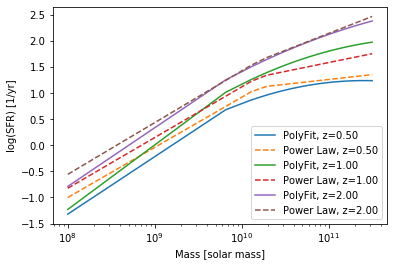

In [16]:
Sm = np.linspace(10**8.0, 10**11.5)

for z in [0.5, 1, 2]:
    SFR_P = polyFit(z, Sm)
    # print(SFR)
    SFR_pl = pl_HL(z, Sm)

    pl.semilogx(Sm, SFR_P, label="PolyFit, z=%.2f" %z)
    pl.semilogx(Sm, SFR_pl, label="Power Law, z=%.2f" %z, ls="--")

pl.legend()
pl.ylabel('log(SFR) [1/yr]')
pl.xlabel('Mass [solar mass]')
# pl.title('')

# pl.ylim(1e-25, 10)
pl.show()

In [17]:
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value

cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)

# z_at_value(cosmo.age, 0.5 * u.Gyr)

### Main Sequence: stellar mass vs. SFR relationship  
Speagle2014  
5.1 The Evolution of the Galaxy “Main Sequence”

In [18]:
"""
The interpublication scatter around this fit is σi = (0.08, 0.09, 0.11) dex, for the minimum, median, and maximum 
values within the fitted mass range logM∗ = 9.7 – 11.1, respectively. This encompasses a majority of the age of 
the Universe (z ∼ 0.25 – 2.75), and provides good fits to the observed SFRs all the way out z ∼ 5
"""
def phi(z, mass):
    if z > 5:
        print("Warning, redshift out of well fitting zone of this model.")
        
    #     t: age of universe in Gyr
    t = cosmo.age(z).value
    return (0.84-0.026*t)*np.log10(mass) - (6.51-0.11*t) #Equ 28


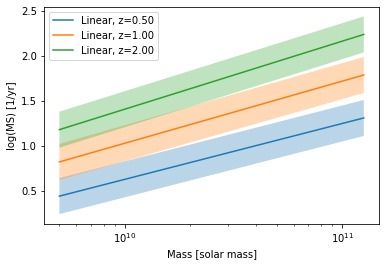

In [22]:
Sm = np.linspace(10**9.7, 10**11.1)

for z in [0.5, 1, 2]:
    SFR = phi(z, Sm)
    error = np.ones(len(SFR)) * 0.2 #the stated "true" scatter

    pl.semilogx(Sm, SFR, label="Linear, z=%.2f" %z)
    pl.fill_between(Sm, SFR-error, SFR+error, alpha=0.3)

pl.legend()
pl.ylabel('log(MS) [1/yr]')
pl.xlabel('Mass [solar mass]')
# pl.title('')

# pl.ylim(1e-25, 10)
pl.show()

z = np.linspace(.1, 4, 100)

#but really here you need to evolve the stellar mass with time to get a proper function, as that will change

# for Sm in [10**9, 10**10, 10**11]:
#     SFR = phi(z, Sm)

#     pl.plot(z, SFR, label="Linear, Sm=%.2e" %Sm)

# pl.legend()
# pl.ylabel('log(MS) [1/yr]')
# pl.xlabel('Redshift')
# # pl.title('')

# # pl.ylim(1e-25, 10)
# pl.show()